# Selección de datos de movilidad, dentro del área de estudio
## Cargar paquetes necesarios

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

## Cargar shapefile con límites de área de estudio

### Provincia Azuay

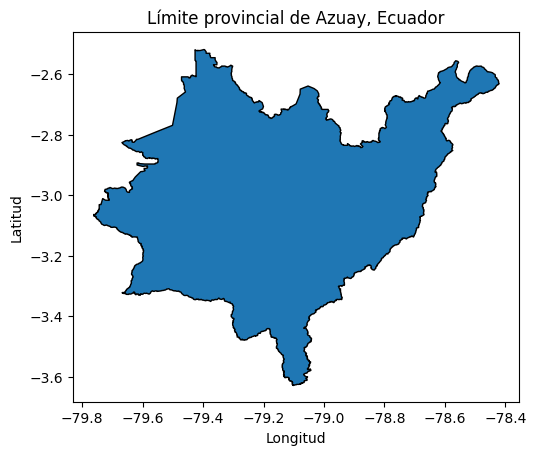

In [3]:
# Path del Shapefile de Azuay
azuay_shapefile_path = 'shape_data/LIMITE_AZUAY_PROVINCIA/LIMITE_AZUAY_PROVINCIA.shp'
gdf_azuay = gpd.read_file(azuay_shapefile_path)

# Establecer el sistema de coordendas
gdf_azuay = gdf_azuay.to_crs(epsg=4326)

# Visualizar el shapefile
gdf_azuay.plot(edgecolor='black')
plt.title('Límite provincial de Azuay, Ecuador')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

### Cantón Cuenca

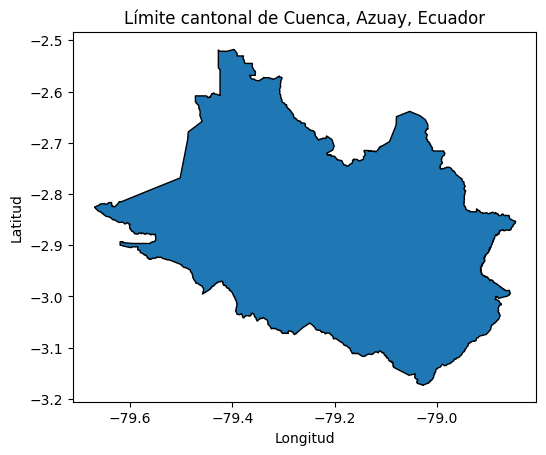

In [4]:
# Path del Shapefile de Azuay
cuenca_shapefile_path = 'shape_data/LIMITE_CUENCA_CANTON/LIMITE_CUENCA_CANTON.shp'
gdf_cuenca = gpd.read_file(cuenca_shapefile_path)

# Establecer el sistema de coordendas EPSG:4326
gdf_cuenca = gdf_cuenca.to_crs(epsg=4326)

# Visualizar el shapefile
gdf_cuenca.plot(edgecolor='black')
plt.title('Límite cantonal de Cuenca, Azuay, Ecuador')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

## Cargar datos 'Trips' y 'Points'

In [5]:
# Leer CSVs de trips y points
df_trips = pd.read_csv('raw_data/tripssep2023.csv')
df_points = pd.read_csv('raw_data/puntossept2023.csv')

# Visualizar data (head)
print("________ POINTS ________")
print(f"Numero de tuplas en Points: {len(df_points)}\n")
print(df_points.head())

print("________ TRIPS ________")
print(f"Numero de tuplas en Trips: {len(df_trips)}\n")
print(df_trips.head())

C:\Users\adm\AppData\Local\Temp\ipykernel_16912\560960943.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_points = pd.read_csv('raw_data/puntossept2023.csv')


         id   company_token                                  uuid  \
0  16911233  bryan.minchala  BDF1BBB0-53D1-4A10-A2CB-A61B9240449C   
1  16911234  bryan.minchala  D5AD12C0-CC1C-4E2E-97BA-F26E3D9CB8BC   
2  16911235  bryan.minchala  E1C0146E-FA6F-403A-AA4C-1BA6F9BD1E4F   
3  16911236  bryan.minchala  B2F00DCF-3871-4FA6-8005-6AC251A25D78   
4  16911237  bryan.minchala  2D2E930E-12DE-4D23-9022-325AEB54F386   

          device_id              device_model  latitude  longitude  accuracy  \
0  iPhone7-2-12-5-7  flutter-iPhone7,2-12.5.7 -2.787665 -78.859393       175   
1  iPhone7-2-12-5-7  flutter-iPhone7,2-12.5.7 -2.787549 -78.859319       175   
2  iPhone7-2-12-5-7  flutter-iPhone7,2-12.5.7 -2.788432 -78.859697       165   
3  iPhone7-2-12-5-7  flutter-iPhone7,2-12.5.7 -2.788600 -78.859895        65   
4  iPhone7-2-12-5-7  flutter-iPhone7,2-12.5.7 -2.788765 -78.859987       160   

   altitude  speed  ...  activity_type  activity_confidence battery_level  \
0    2493.1   -1.0  ...    

### Ver tipos de dato de Dataframes

In [6]:
# Ver tipos de dato de Points
print(df_points.dtypes)

id                       int64
company_token           object
uuid                    object
device_id               object
device_model            object
latitude               float64
longitude              float64
accuracy                 int64
altitude               float64
speed                  float64
heading                float64
odometer               float64
event                   object
activity_type           object
activity_confidence      int64
battery_level          float64
battery_is_charging       bool
is_moving                 bool
geofence               float64
provider                object
extras                  object
recorded_at             object
created_at              object
dtype: object


In [7]:
# Ver tipos de dato de Trips
print(df_trips.dtypes)

Unnamed: 0           int64
tripid               int64
points               int64
travel_distance    float64
departure           object
arrival             object
travel_time        float64
uid                 object
origin_x           float64
origin_y           float64
destination_x      float64
destination_y      float64
dtype: object


## Tratamiento de datos #1

### Transformar coordenadas de `EPSG:32717` a `EPSG:4326` en 'Trips'

In [8]:
# Crear una geometría a partir de las coordenadas (X, Y) en EPSG:32717 (UTM)
# Origin
geom_trips_origin = [Point(xy) for xy in zip(df_trips['origin_x'], df_trips['origin_y'])]
gdf_trips_origin = gpd.GeoDataFrame(df_trips, geometry=geom_trips_origin, crs="EPSG:32717")
# Destination
geom_trips_dest = [Point(xy) for xy in zip(df_trips['destination_x'], df_trips['destination_y'])]
gdf_trips_dest = gpd.GeoDataFrame(df_trips, geometry=geom_trips_dest, crs="EPSG:32717")

# Transformar geometría a EPSG:4326
# Origin
gdf_trips_origin = gdf_trips_origin.to_crs(epsg=4326)
# Destination
gdf_trips_dest = gdf_trips_dest.to_crs(epsg=4326)

# Extraer latitud y longitud desde la geometría transformada
# Origin
df_trips['origin_lat'] = gdf_trips_origin.geometry.y
df_trips['origin_lon'] = gdf_trips_origin.geometry.x
# Destination
df_trips['destination_lat'] = gdf_trips_dest.geometry.y
df_trips['destination_lon'] = gdf_trips_dest.geometry.x

# Guardar el DataFrame como archivo CSV
df_trips.to_csv('raw_data/tripssep2023_epsg4326.csv', index=False)

# Mostrar Dataframe con nuevas columnas de coordenadas EPSG:4326
print(df_trips.head())

   Unnamed: 0  tripid  points  travel_distance            departure  \
0           1       1     101         4.487780  2023-09-01 00:00:09   
1           2       2     192        10.025249  2023-09-01 03:34:32   
2           3       3     269        23.587917  2023-09-01 12:51:21   
3           4       4     511        35.984994  2023-09-01 18:57:50   
4           5       5     215        14.112256  2023-09-01 21:36:55   

               arrival  travel_time             uid       origin_x  \
0  2023-09-01 00:08:39      510.444  bryan.minchala  735565.647103   
1  2023-09-01 03:44:52      620.147  bryan.minchala  738784.421781   
2  2023-09-01 13:16:49     1528.354  bryan.minchala  722173.818482   
3  2023-09-01 19:39:51     2521.761  bryan.minchala  738773.989202   
4  2023-09-01 22:15:55     2340.916  bryan.minchala  739423.945048   

       origin_y  destination_x  destination_y  origin_lat  origin_lon  \
0  9.689275e+06  737937.468388   9.691576e+06   -2.809267  -78.880985   
1  9.6

### Convertir campos object a timestamp para 'departure', 'arrival', 'recorded_at' y 'created_at'

In [9]:
# Convertir en Trips
df_trips['departure'] = pd.to_datetime(df_trips['departure'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_trips['arrival'] = pd.to_datetime(df_trips['arrival'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [10]:
# Convertir en Points
df_points['recorded_at'] = pd.to_datetime(df_points['recorded_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_points['created_at'] = pd.to_datetime(df_points['created_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

ATENCIÓN: En caso de cargar nuevamente los CSV, se deben hacer las conversiones de nuevo.

### Quitar datos nulos de Dataframes

In [54]:
# # Trips
# print(f'Número de filas en Trip antes de limpiar: {len(df_trips)}')
# df_limpio = df_trips.dropna(how='all')
# print(f'Número de filas en Trip despues de limpiar: {len(df_limpio)}')

# # Points


Número de filas en Trip antes de limpiar: 19952
Número de filas en Trip despues de limpiar: 19952


## Mostrar puntos trip_origin y trip_destination de Trips

In [16]:
# Crear un GeoDataframe con puntos de origin y destination en EPSG:4326 para Trips
gdf_trips_origin = gpd.GeoDataFrame(
    df_trips, geometry=gpd.points_from_xy(df_trips['origin_lon'], df_trips['origin_lat']), crs="EPSG:4326"
)

gdf_trips_dest = gpd.GeoDataFrame(
    df_trips, geometry=gpd.points_from_xy(df_trips['destination_lon'], df_trips['destination_lat']), crs="EPSG:4326"
)

# Crear un GeoDataframe con puntos en EPSG:4326 para Points
gdf_points_point = gpd.GeoDataFrame(
    df_points, geometry=gpd.points_from_xy(df_points['longitude'], df_points['latitude']), crs="EPSG:4326"
)

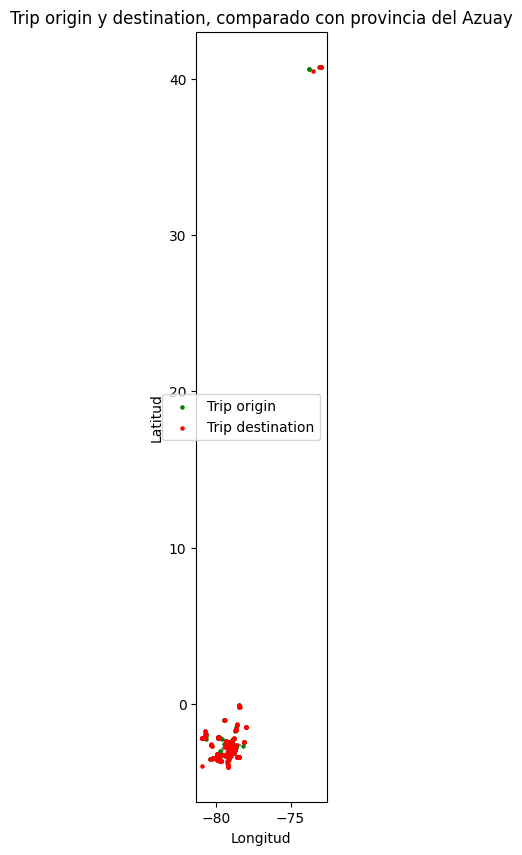

In [13]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el shapefile de Cuenca
gdf_azuay.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Graficar los puntos
gdf_trips_origin.plot(ax=ax, color='green', markersize=5, label='Trip origin')
gdf_trips_dest.plot(ax=ax, color='red', markersize=5, label='Trip destination')

# Añadir etiquetas y leyenda
plt.title('Trip origin y destination, comparado con provincia del Azuay')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()

# Mostrar el gráfico
plt.show()

### Filtrar viajes dentro de la provincia del Azuay

In [17]:
# Realizar intersección con el poligono del shapefile
points_within = gdf_points_point[gdf_points_point.geometry.within(gdf_azuay.unary_union)]

# Mostrar los puntos dentro del polígono
print(points_within.head())

C:\Users\adm\AppData\Local\Temp\ipykernel_16912\1183730867.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  points_within = gdf_points_point[gdf_points_point.geometry.within(gdf_azuay.unary_union)]
